In [3]:
import d2lzh as d2l
import torch
from torch.utils import data
from torch import nn
from torch import optim
from torch.nn import init

In [4]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, features ** 2, features ** 3), dim=1)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1] + true_w[2] * poly_features[:, 2] + true_b)
labels += torch.randn(labels.shape) * 0.1

In [5]:
features[:2], poly_features[:2], labels[:2]

(tensor([[ 0.5578],
         [-2.1950]]), tensor([[  0.5578,   0.3112,   0.1736],
         [ -2.1950,   4.8180, -10.5754]]), tensor([  5.5866, -73.3862]))

In [6]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [7]:
num_epochs, loss = 100, nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Linear(train_features.shape[1], 1)
    init.normal_(net.weight)
    batch_size = min(10, train_labels.shape[0])
    train_iter = data.DataLoader(data.TensorDataset(train_features, train_labels), batch_size, shuffle=True)
    optimizer = optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data, '\nbias:', net.bias.data)

final epoch: train loss 352.1072998046875 test loss 848.303955078125
weight: tensor([[ 0.0509, -0.5323,  0.4864]]) 
bias: tensor([0.4481])


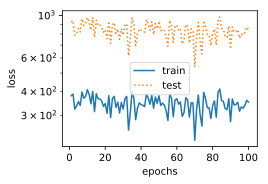

In [8]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:])

final epoch: train loss 372.6097106933594 test loss 942.089599609375
weight: tensor([[1.5984]]) 
bias: tensor([-0.1578])


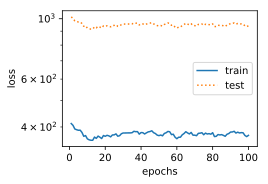

In [9]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

final epoch: train loss 1269.5054931640625 test loss 1617.768310546875
weight: tensor([[-8.2332, -5.8206,  0.4303]]) 
bias: tensor([-19.3446])


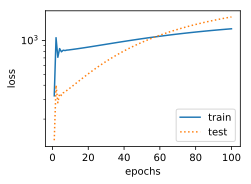

In [10]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2], labels[n_train:])